In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band08_wn_1380_520',
                          'ng_20',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_10__10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all1',
                          'bigsum',
                          'option_wgt_1',
                          'crd_1fdb14d',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band08_wn_1380_520',
                          'ng_20',
                          'g_descending',
                          'refPTs_P_1_T_250__P_500_T_250',
                          'ng_refs_10__10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all1',
                          'bigsum',
                          'option_wgt_1',
                          'crd_1fdb14d',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [9]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 20 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [10]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [11]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [12]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [13]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 1380

nband = 520

nv = 200

dv = 0.005

tsfc = 294.0

ng = 20

nref = 2

p_refs = (/ 1,  500 /)

t_refs = (/ 250, 250 /)

ng_refs = (/ 10, 10 /)

data wgt
     &     /10*1, 10*1/

planck_wgt_flux = 2

option_wgt = 1

include 'mls75.pro'


In [14]:
fig.display_hrefanchor()

In [15]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [16]:
table_dgdgs.display_hrefanchor()

In [17]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [18]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [19]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

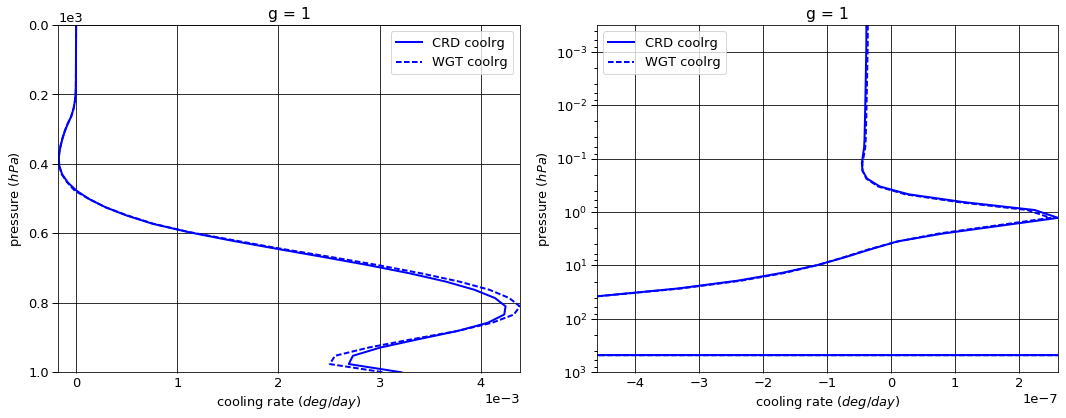

# Figure: cooling rate g-group 2

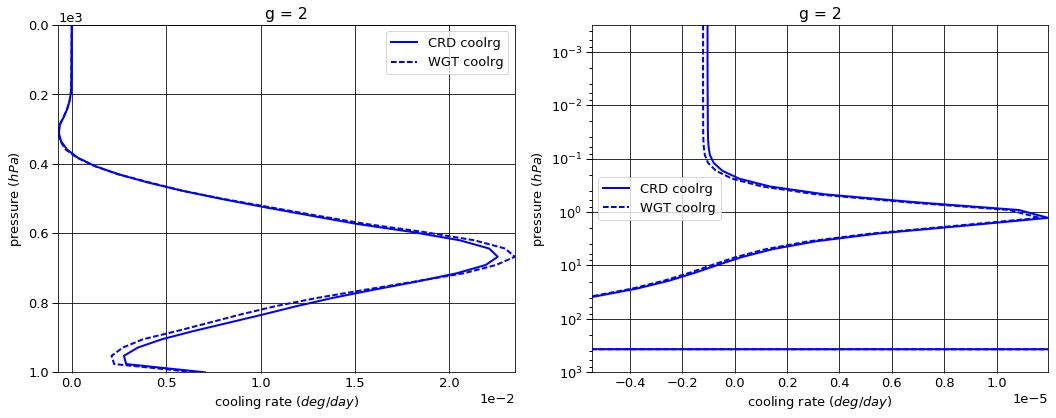

# Figure: cooling rate g-group 3

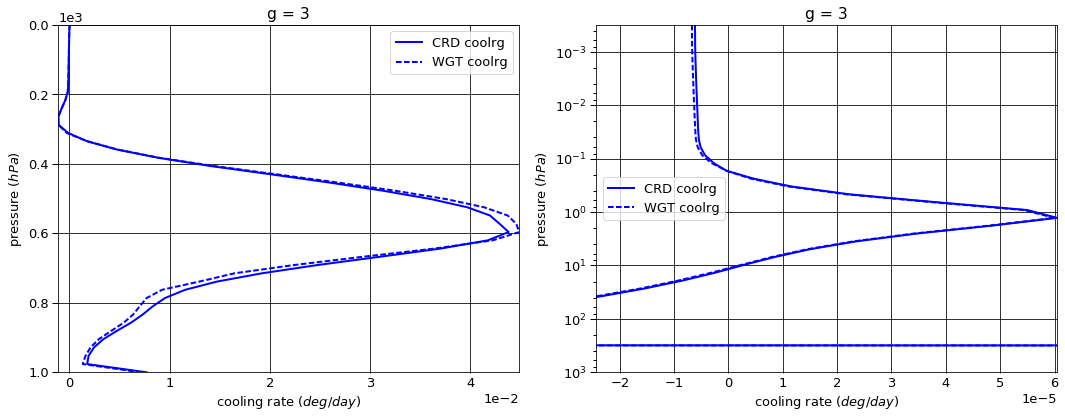

# Figure: cooling rate g-group 4

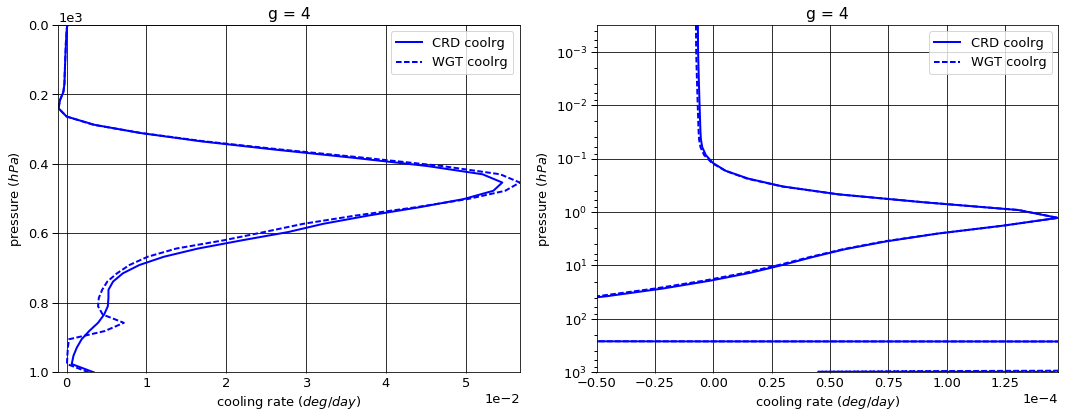

# Figure: cooling rate g-group 5

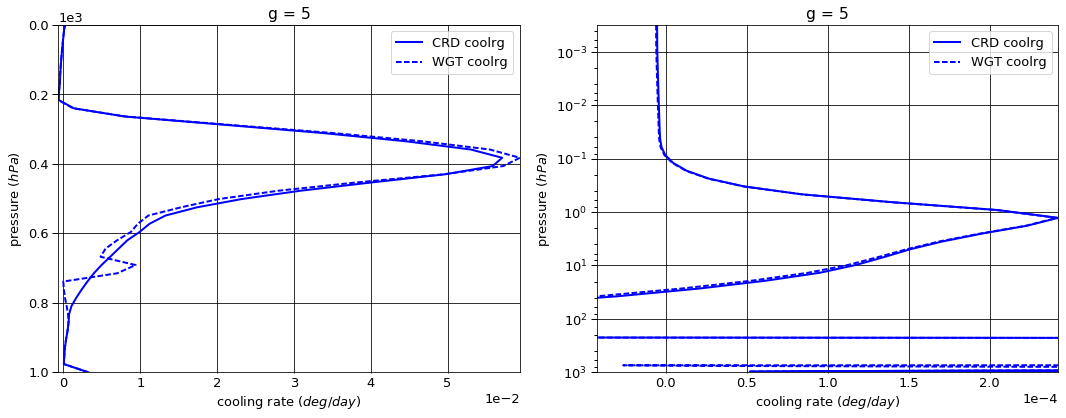

# Figure: cooling rate g-group 6

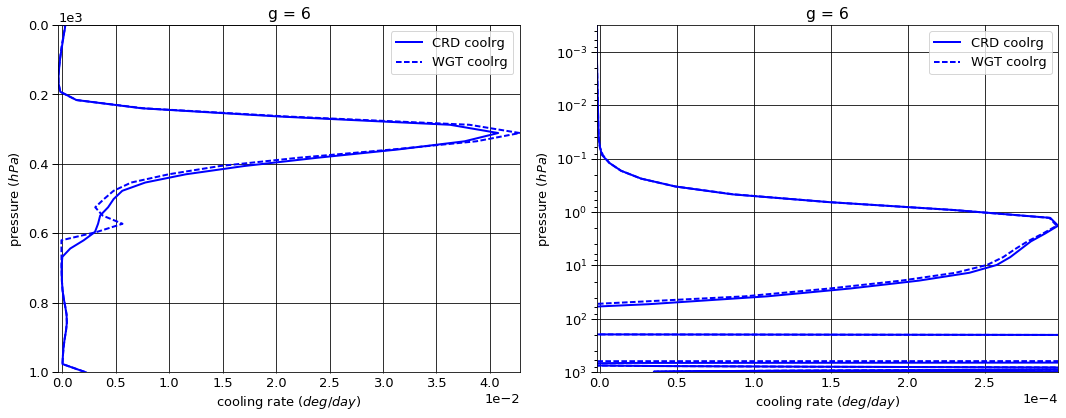

# Figure: cooling rate g-group 7

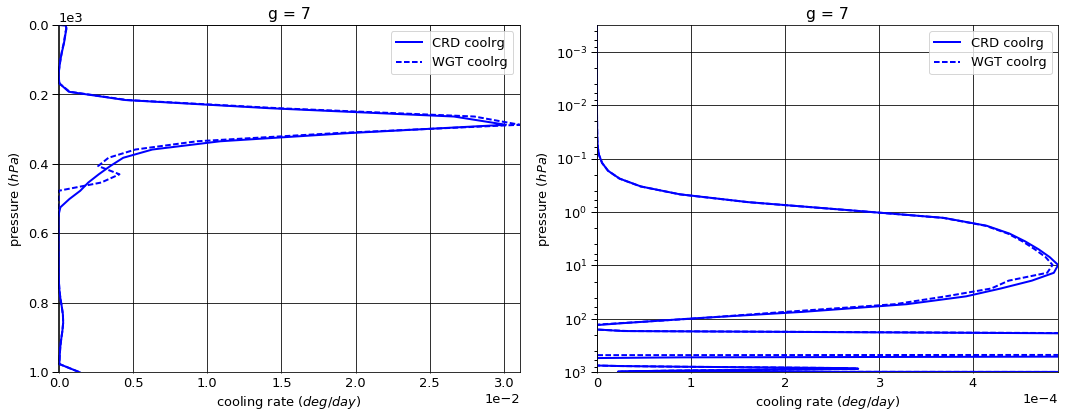

# Figure: cooling rate g-group 8

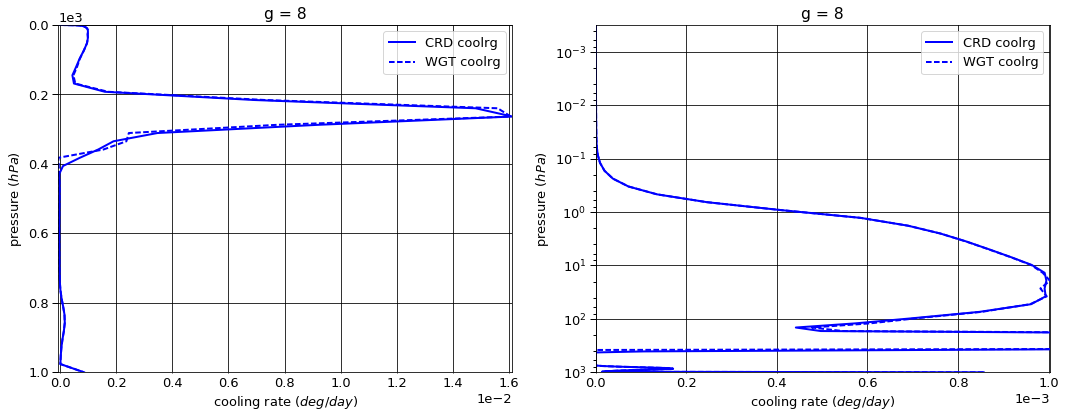

# Figure: cooling rate g-group 9

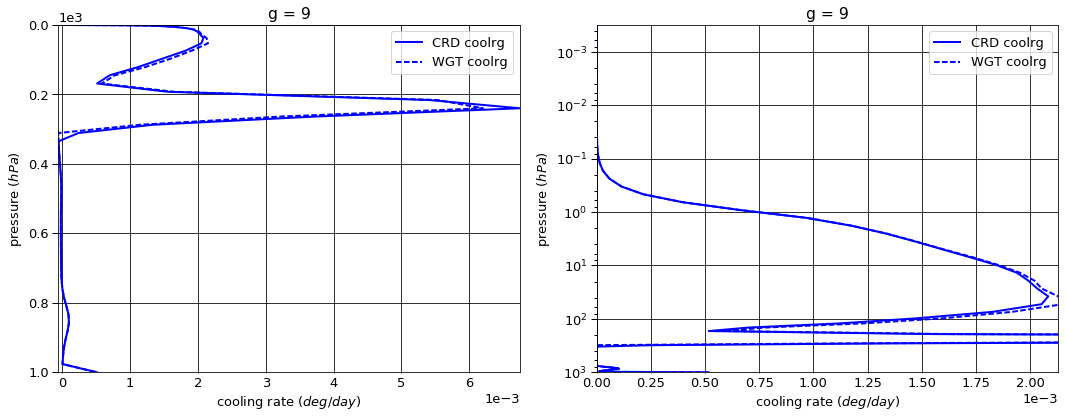

# Figure: cooling rate g-group 10

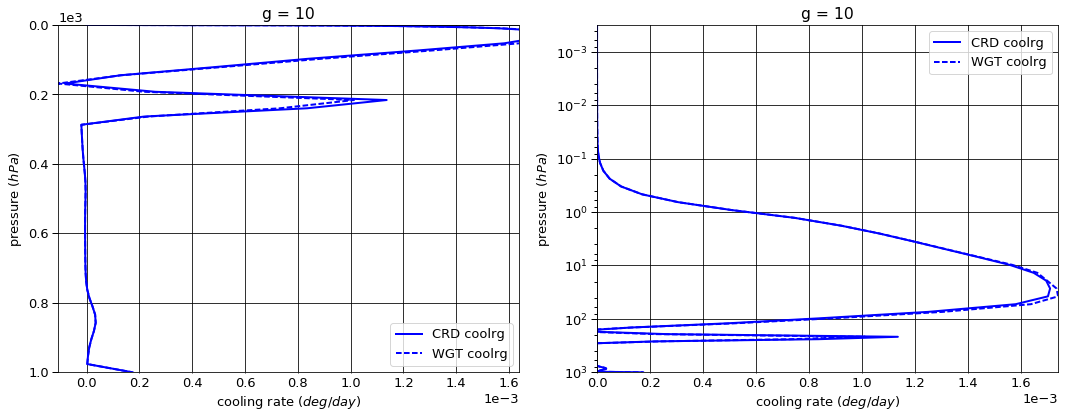

# Figure: cooling rate g-group 11

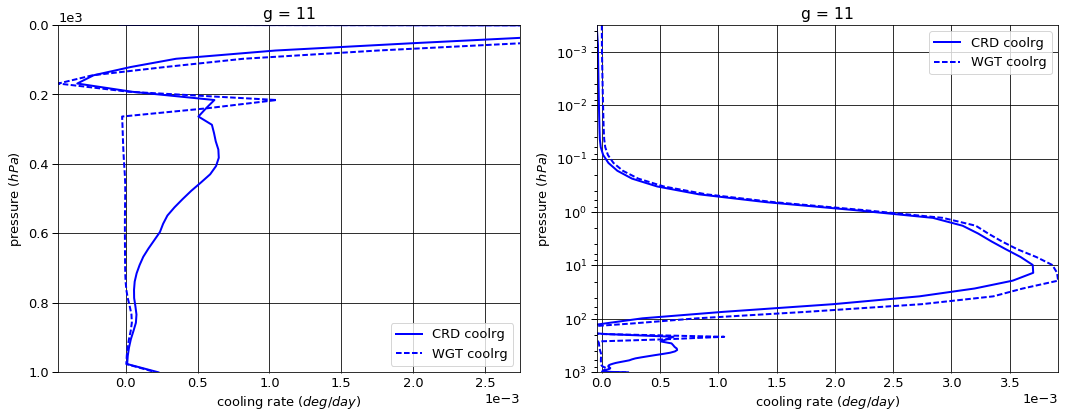

# Figure: cooling rate g-group 12

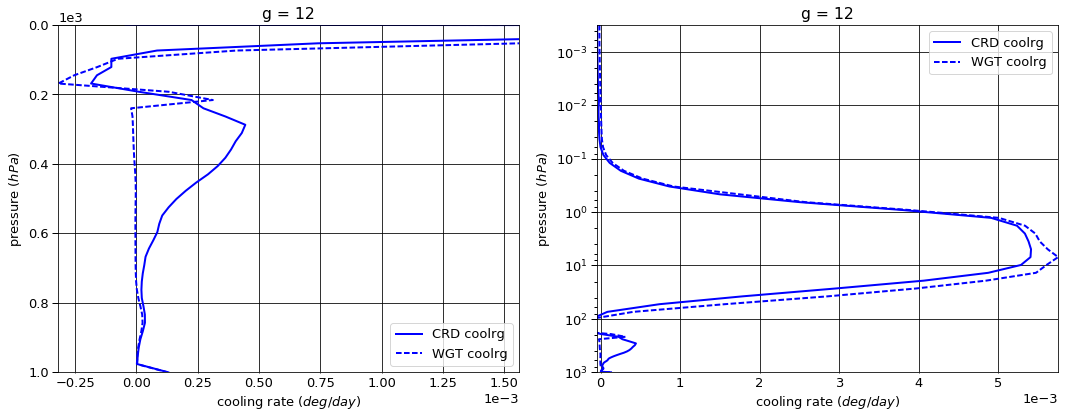

# Figure: cooling rate g-group 13

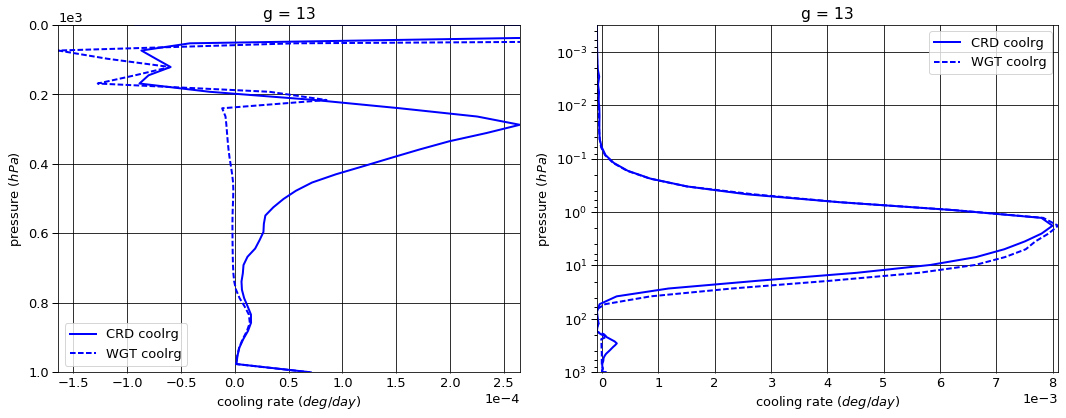

# Figure: cooling rate g-group 14

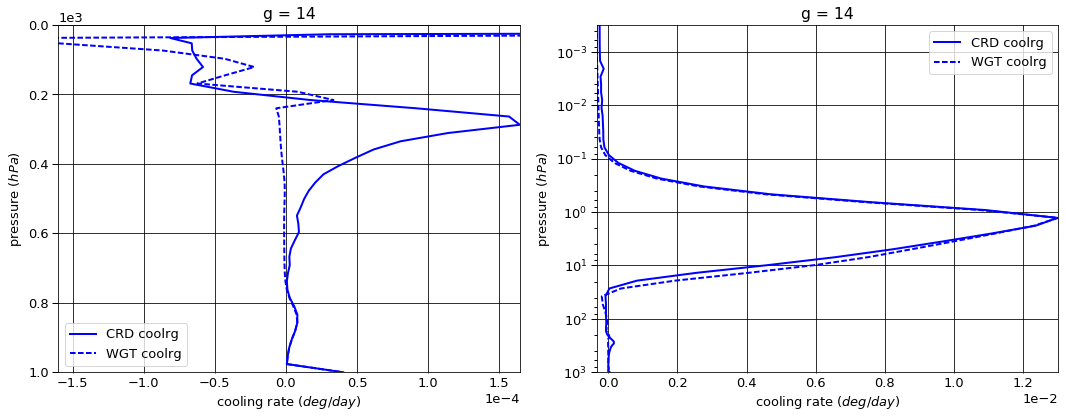

# Figure: cooling rate g-group 15

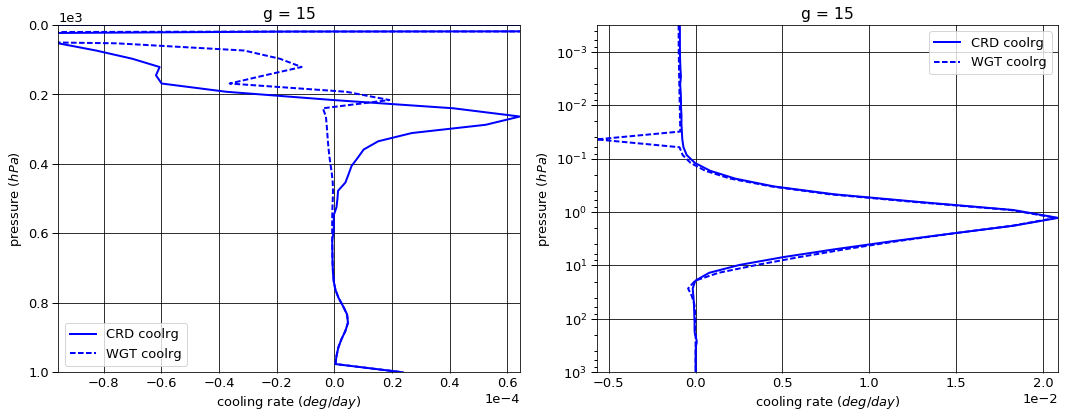

# Figure: cooling rate g-group 16

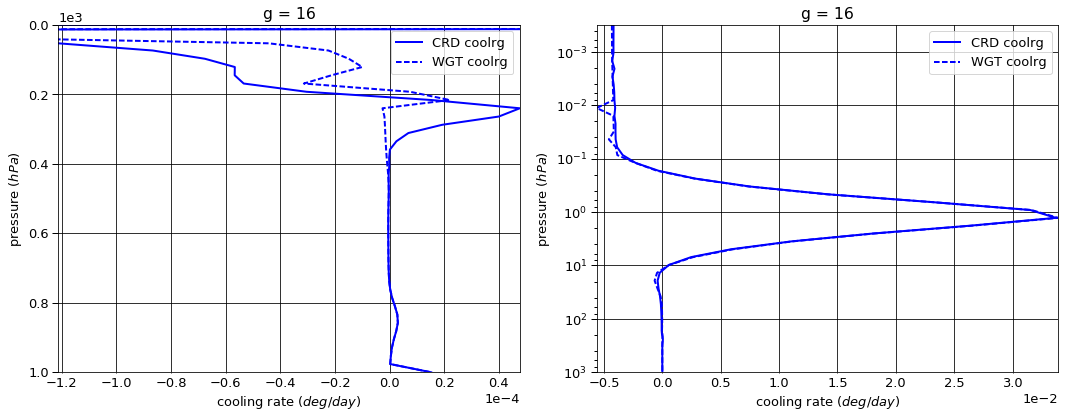

# Figure: cooling rate g-group 17

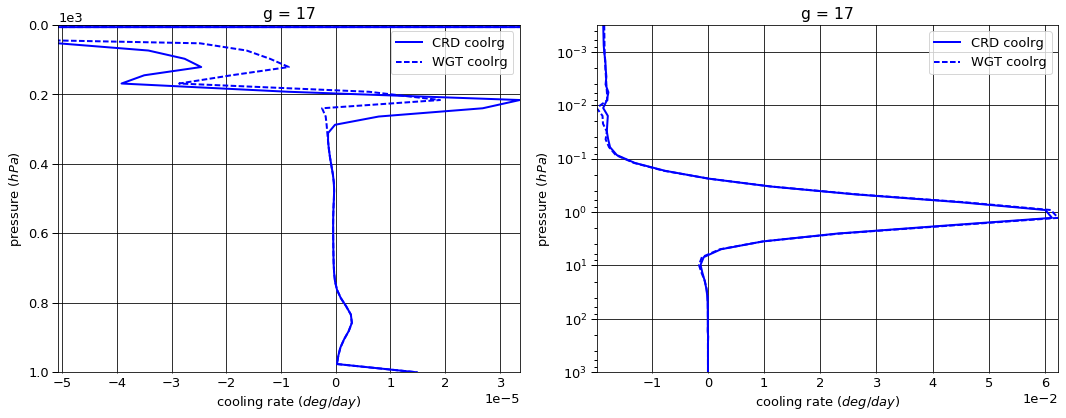

# Figure: cooling rate g-group 18

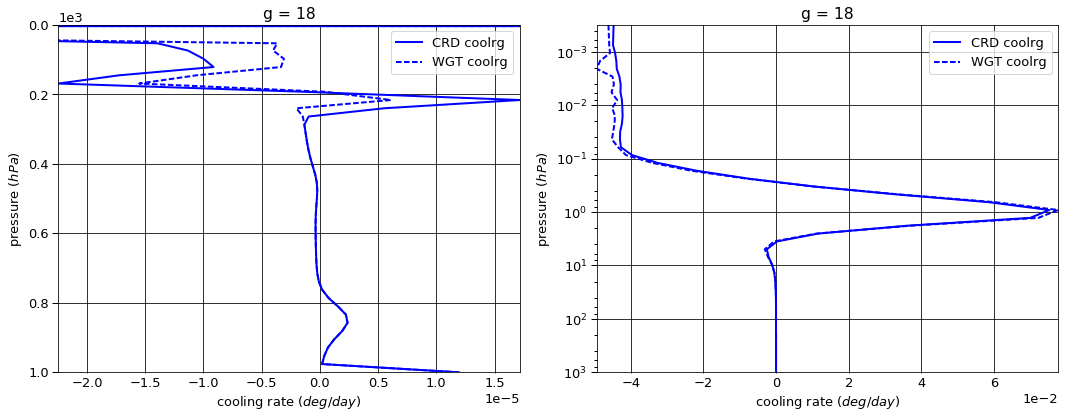

# Figure: cooling rate g-group 19

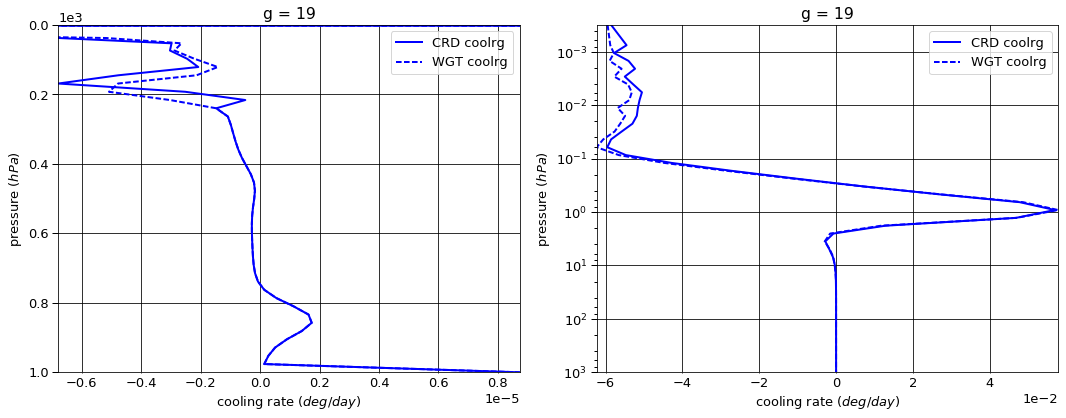

# Figure: cooling rate g-group 20

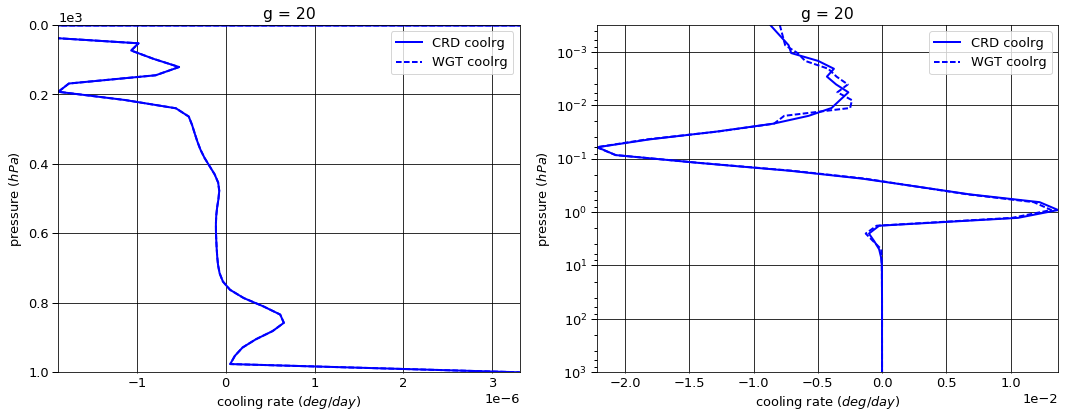

# Figure: cooling rate g-group total

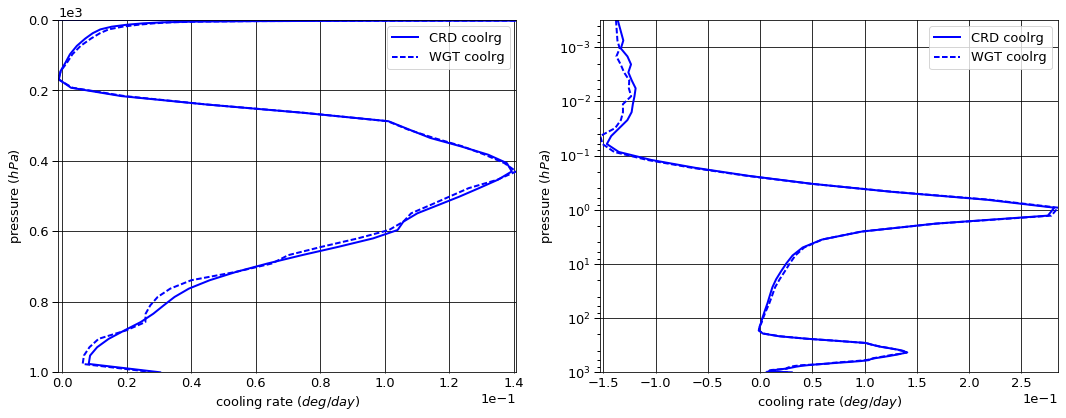

In [20]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [21]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.179642  0.000000 -0.179642
   1013.0   76    -0.304127  0.284538 -0.019589
2  0.0      1     -0.834276  0.000000 -0.834276
   1013.0   76    -1.735508  1.712578 -0.022930
3  0.0      1     -1.543603  0.000000 -1.543603
   1013.0   76    -4.013483  3.992956 -0.020527
4  0.0      1     -1.678920  0.000000 -1.678920
   1013.0   76    -5.893601  5.884802 -0.008799
5  0.0      1     -1.449598  0.000000 -1.449598
   1013.0   76    -6.794219  6.785178 -0.009041
6  0.0      1     -0.755531  0.000000 -0.755531
   1013.0   76    -4.662364  4.656145 -0.006219
7  0.0      1     -0.374109  0.000000 -0.374109
   1013.0   76    -2.950245  2.946327 -0.003918
8  0.0      1     -0.180234  0.000000 -0.180234
   1013.0   76    -1.810733  1.808331 -0.002402
9  0.0      1     -0.087070  0.000000 -0.087070
   1013.0   76    -1.088707  1.087261 -0.001447
10 0.0      1     -0.026907  0.000000 -0.026907
   1013.0   76    -0.365658  0.365169 -0.000488
11 0.0      1     -0.051963  0.000000 -0.051963
   1013.0   76    -0.445533  0.444901 -0.000632
12 0.0      1     -0.033429  0.000000 -0.033429
   1013.0   76    -0.269134  0.268771 -0.000363
13 0.0      1     -0.020150  0.000000 -0.020150
   1013.0   76    -0.147232  0.147035 -0.000197
14 0.0      1     -0.013676  0.000000 -0.013676
   1013.0   76    -0.084938  0.084825 -0.000113
15 0.0      1     -0.010253  0.000000 -0.010253
   1013.0   76    -0.049831  0.049765 -0.000067
16 0.0      1     -0.009268  0.000000 -0.009268
   1013.0   76    -0.032396  0.032353 -0.000043
17 0.0      1     -0.011423  0.000000 -0.011423
   1013.0   76    -0.031325  0.031283 -0.000042
18 0.0      1     -0.009314  0.000000 -0.009314
   1013.0   76    -0.025283  0.025250 -0.000033
19 0.0      1     -0.004723  0.000000 -0.004723
   1013.0   76    -0.018397  0.018373 -0.000025
20 0.0      1     -0.000892  0.000000 -0.000892
   1013.0   76    -0.006901  0.006892 -0.000009


WGT


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.177356  0.000000 -0.177356
   1013.0   76    -0.304127  0.287760 -0.016367
2  0.0      1     -0.819699  0.000000 -0.819699
   1013.0   76    -1.735508  1.715608 -0.019900
3  0.0      1     -1.519516  0.000000 -1.519516
   1013.0   76    -4.013483  3.994859 -0.018624
4  0.0      1     -1.651189  0.000000 -1.651189
   1013.0   76    -5.893601  5.885842 -0.007760
5  0.0      1     -1.423266  0.000000 -1.423266
   1013.0   76    -6.794219  6.785179 -0.009041
6  0.0      1     -0.741477  0.000000 -0.741477
   1013.0   76    -4.662364  4.656145 -0.006219
7  0.0      1     -0.367553  0.000000 -0.367553
   1013.0   76    -2.950245  2.946327 -0.003918
8  0.0      1     -0.176322  0.000000 -0.176322
   1013.0   76    -1.810733  1.808331 -0.002402
9  0.0      1     -0.084984  0.000000 -0.084984
   1013.0   76    -1.088707  1.087261 -0.001447
10 0.0      1     -0.026721  0.000000 -0.026721
   1013.0   76    -0.365658  0.365169 -0.000488
11 0.0      1     -0.036228  0.000000 -0.036228
   1013.0   76    -0.445533  0.444944 -0.000589
12 0.0      1     -0.026410  0.000000 -0.026410
   1013.0   76    -0.269134  0.268778 -0.000357
13 0.0      1     -0.018487  0.000000 -0.018487
   1013.0   76    -0.147232  0.147036 -0.000196
14 0.0      1     -0.013986  0.000000 -0.013986
   1013.0   76    -0.084938  0.084825 -0.000113
15 0.0      1     -0.010966  0.000000 -0.010966
   1013.0   76    -0.049831  0.049765 -0.000067
16 0.0      1     -0.009595  0.000000 -0.009595
   1013.0   76    -0.032396  0.032353 -0.000043
17 0.0      1     -0.011588  0.000000 -0.011588
   1013.0   76    -0.031325  0.031283 -0.000042
18 0.0      1     -0.009385  0.000000 -0.009385
   1013.0   76    -0.025283  0.025250 -0.000033
19 0.0      1     -0.004609  0.000000 -0.004609
   1013.0   76    -0.018397  0.018373 -0.000025
20 0.0      1     -0.000833  0.000000 -0.000833
   1013.0   76    -0.006901  0.006892 -0.000009


WGT - CRD


flug          fldg         fnetg
g  pressure level                                      
1  0.0      1      0.002286  0.000000e+00  2.285970e-03
   1013.0   76     0.000000  3.221640e-03  3.221642e-03
2  0.0      1      0.014577  0.000000e+00  1.457712e-02
   1013.0   76     0.000000  3.030200e-03  3.030202e-03
3  0.0      1      0.024087  0.000000e+00  2.408720e-02
   1013.0   76     0.000000  1.903000e-03  1.902918e-03
4  0.0      1      0.027732  0.000000e+00  2.773170e-02
   1013.0   76     0.000000  1.039600e-03  1.039571e-03
5  0.0      1      0.026331  0.000000e+00  2.633140e-02
   1013.0   76     0.000000  6.000000e-07  5.874000e-07
6  0.0      1      0.014054  0.000000e+00  1.405396e-02
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
7  0.0      1      0.006556  0.000000e+00  6.555940e-03
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
8  0.0      1      0.003911  0.000000e+00  3.911350e-03
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
9  0.0      1      0.002086  0.000000e+00  2.085821e-03
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
10 0.0      1      0.000186  0.000000e+00  1.857880e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
11 0.0      1      0.015735  0.000000e+00  1.573500e-02
   1013.0   76     0.000000  4.314000e-05  4.314098e-05
12 0.0      1      0.007019  0.000000e+00  7.018542e-03
   1013.0   76     0.000000  6.530000e-06  6.523370e-06
13 0.0      1      0.001663  0.000000e+00  1.663437e-03
   1013.0   76     0.000000  8.800000e-07  8.737000e-07
14 0.0      1     -0.000310  0.000000e+00 -3.104290e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
15 0.0      1     -0.000713  0.000000e+00 -7.130200e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
16 0.0      1     -0.000327  0.000000e+00 -3.273871e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
17 0.0      1     -0.000165  0.000000e+00 -1.652950e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
18 0.0      1     -0.000071  0.000000e+00 -7.129740e-05
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
19 0.0      1      0.000114  0.000000e+00  1.139945e-04
   1013.0   76     0.000000  0.000000e+00  0.000000e+00
20 0.0      1      0.000060  0.000000e+00  5.956726e-05
   1013.0   76     0.000000  0.000000e+00  0.000000e+00

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -3.859983e-08
   1001.112500 75     3.217782e-03
2  0.000312    1     -1.039412e-06
   1001.112500 75     7.049243e-03
3  0.000312    1     -6.159041e-06
   1001.112500 75     7.714110e-03
4  0.000312    1     -6.517019e-06
   1001.112500 75     3.402470e-03
5  0.000312    1     -5.301131e-06
   1001.112500 75     3.224687e-03
6  0.000312    1     -2.031227e-06
   1001.112500 75     2.217799e-03
7  0.000312    1     -2.847425e-07
   1001.112500 75     1.397489e-03
8  0.000312    1      4.533077e-09
   1001.112500 75     8.566383e-04
9  0.000312    1      7.956414e-08
   1001.112500 75     5.158886e-04
10 0.000312    1      2.346233e-08
   1001.112500 75     1.741005e-04
11 0.000312    1     -4.288615e-05
   1001.112500 75     2.268274e-04
12 0.000312    1     -4.372166e-05
   1001.112500 75     1.300466e-04
13 0.000312    1     -8.743158e-05
   1001.112500 75     7.057866e-05
14 0.000312    1     -2.505460e-04
   1001.112500 75     4.028978e-05
15 0.000312    1     -9.072240e-04
   1001.112500 75     2.372891e-05
16 0.000312    1     -4.175520e-03
   1001.112500 75     1.525335e-05
17 0.000312    1     -1.865920e-02
   1001.112500 75     1.485074e-05
18 0.000312    1     -4.475399e-02
   1001.112500 75     1.192873e-05
19 0.000312    1     -5.855127e-02
   1001.112500 75     8.740726e-06
20 0.000312    1     -8.706104e-03
   1001.112500 75     3.310041e-06


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -3.644924e-08
   1001.112500 75     3.039204e-03
2  0.000312    1     -1.209880e-06
   1001.112500 75     6.573201e-03
3  0.000312    1     -6.722070e-06
   1001.112500 75     7.098392e-03
4  0.000312    1     -7.336224e-06
   1001.112500 75     2.767688e-03
5  0.000312    1     -5.922535e-06
   1001.112500 75     3.224083e-03
6  0.000312    1     -2.067229e-06
   1001.112500 75     2.217799e-03
7  0.000312    1     -2.720657e-07
   1001.112500 75     1.397489e-03
8  0.000312    1      4.630381e-08
   1001.112500 75     8.566383e-04
9  0.000312    1      8.613166e-08
   1001.112500 75     5.158886e-04
10 0.000312    1      2.287093e-08
   1001.112500 75     1.741005e-04
11 0.000312    1      1.595870e-06
   1001.112500 75     2.099274e-04
12 0.000312    1     -1.600632e-05
   1001.112500 75     1.271926e-04
13 0.000312    1     -9.345154e-05
   1001.112500 75     6.996185e-05
14 0.000312    1     -3.370771e-04
   1001.112500 75     4.028978e-05
15 0.000312    1     -9.786751e-04
   1001.112500 75     2.372891e-05
16 0.000312    1     -4.317954e-03
   1001.112500 75     1.525335e-05
17 0.000312    1     -1.848123e-02
   1001.112500 75     1.485074e-05
18 0.000312    1     -4.616672e-02
   1001.112500 75     1.192873e-05
19 0.000312    1     -5.946170e-02
   1001.112500 75     8.740726e-06
20 0.000312    1     -7.957600e-03
   1001.112500 75     3.310041e-06


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      2.150585e-09
   1001.112500 75    -1.785783e-04
2  0.000312    1     -1.704677e-07
   1001.112500 75    -4.760417e-04
3  0.000312    1     -5.630292e-07
   1001.112500 75    -6.157181e-04
4  0.000312    1     -8.192052e-07
   1001.112500 75    -6.347824e-04
5  0.000312    1     -6.214039e-07
   1001.112500 75    -6.043000e-07
6  0.000312    1     -3.600190e-08
   1001.112500 75     0.000000e+00
7  0.000312    1      1.267686e-08
   1001.112500 75     0.000000e+00
8  0.000312    1      4.177073e-08
   1001.112500 75     0.000000e+00
9  0.000312    1      6.567521e-09
   1001.112500 75     0.000000e+00
10 0.000312    1     -5.914020e-10
   1001.112500 75     0.000000e+00
11 0.000312    1      4.448202e-05
   1001.112500 75    -1.689996e-05
12 0.000312    1      2.771534e-05
   1001.112500 75    -2.853970e-06
13 0.000312    1     -6.019967e-06
   1001.112500 75    -6.168090e-07
14 0.000312    1     -8.653113e-05
   1001.112500 75     0.000000e+00
15 0.000312    1     -7.145116e-05
   1001.112500 75     0.000000e+00
16 0.000312    1     -1.424334e-04
   1001.112500 75     0.000000e+00
17 0.000312    1      1.779700e-04
   1001.112500 75     0.000000e+00
18 0.000312    1     -1.412733e-03
   1001.112500 75     0.000000e+00
19 0.000312    1     -9.104360e-04
   1001.112500 75     0.000000e+00
20 0.000312    1      7.485035e-04
   1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-7.274982,0.000000,-7.274982
1013.0,76,-30.729616,30.632733,-0.096884



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-7.130173,0.000000,-7.130173
1013.0,76,-30.729616,30.641978,-0.087638



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.144809,0.000000,0.144809
1013.0,76,0.000000,0.009246,0.009245


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.136199
1001.112500,75,0.030316



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.137832
1001.112500,75,0.028390



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.001633
1001.112500,75,-0.001926


In [22]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.023077,0.007574
2,0.072106,0.054901
3,0.125981,0.134329
4,0.185413,0.194318
5,0.216029,0.220257
6,0.149260,0.150591
7,0.092192,0.095826
8,0.055990,0.058893
9,0.033904,0.035335


In [23]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.086608e-23
2,3.151772e-23
3,9.141908e-23
4,2.651666e-22
5,7.691321e-22
6,2.230915e-21
7,6.470905e-21
8,1.876926e-20
9,5.444137e-20


In [25]:
def spreadsheet():
    ng = 20
    ng_refs = [10, 10]
    p_refs = [1, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [26]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.086608e-23,NaN,0.023077,0.007574,0.023077,0.007574,500.0
2,3.151772e-23,2.900561,0.072106,0.054901,0.095183,0.062475,500.0
3,9.141908e-23,2.900561,0.125981,0.134329,0.221163,0.196804,500.0
4,2.651666e-22,2.900561,0.185413,0.194318,0.406577,0.391122,500.0
5,7.691321e-22,2.900561,0.216029,0.220257,0.622606,0.611379,500.0
6,2.230915e-21,2.900561,0.149260,0.150591,0.771865,0.761970,500.0
7,6.470905e-21,2.900561,0.092192,0.095826,0.864058,0.857797,500.0
8,1.876926e-20,2.900561,0.055990,0.058893,0.920048,0.916689,500.0
9,5.444137e-20,2.900561,0.033904,0.035335,0.953952,0.952024,500.0


In [27]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [28]:
pd.set_option('display.max_rows', None)
#display.display(
#    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
#                index_col=[0, 1],
#                sep=r'\s+')
#    )
pd.reset_option('display.max_rows')

# Histogram of wavenumbers in g-group 1

In [29]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [30]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')